In [1]:
# This notebook will: 
#  - read in the CSV form of the data
#  - tokenize the article summary, disproof, and title
#  - perform basic sentiment analysis on the summary, title, and disproof
#  - make a freqdist of the 20 most common words (not including stop words) in the texts
#  - automatically identifiy name entities
#  - provide a search function to pull out a subset of the data based on a keyword
#  - graph the sentiments of the subset of data
#  - TODO: graph freq distribution of subset of data, concordance/collocation based on a certain word in the subset

In [2]:
import pandas as pd
import statistics
import nltk
import math
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk.corpus  
from nltk.text import Text  
from nltk import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download("maxent_ne_chunker")
nltk.download("words")
import string

import numpy as np
import matplotlib.pyplot as plt

stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

import chart_studio.plotly
from plotly import __version__
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

init_notebook_mode(connected=True)
cf.go_offline()

import newspaper
from newspaper import Article
# import googletrans
# from googletrans import Translator

#from translate import Translator

# Going to use textblob for translations
from textblob import TextBlob

import goslate

from scipy import stats
import gc
import seaborn

ModuleNotFoundError: No module named 'nltk'

In [3]:
gc.enable()

In [4]:
# Loop to get all full articles in a df
# TODO: handle exception so that it tries the other URLS

def pull_full_articles(df):
    full_text_list =[]
    counter=0
    for item, row in df.iterrows():
        current_url = row['Link to the disinformation']
        try: 
            current_url = current_url.splitlines()
            article= Article(current_url[0])
            article.download()
            article.parse()
            full_text_list.append(article.text)
        except AttributeError as ae:
            print('Attribute Error on article {0}. Error: {1}'.format(counter,ae))
            full_text_list.append('')
        except:
            print('Article Exception: on article {0}'.format(counter))
            full_text_list.append('')
        counter+=1
    df['full_text'] = full_text_list

In [5]:
# def translate_full_articles(df):
#     for item, row in df

In [6]:
# Extracting Name Entities
# pre-made function to extract all ne
def extract_ne(quote):
    words = word_tokenize(quote)
    tags = nltk.pos_tag(words)
    tree = nltk.ne_chunk(tags, binary=True)
    return set(
        " ".join(i[0] for i in t)
        for t in tree
        if hasattr(t, "label") and t.label() == "NE"
    )

In [7]:
# Writing a function to save files as csv so that not everything has to be processed when the kernel restarts
def save_as_csv(file_name, df):
    full_path = 'C:\\Users\\landw\\OneDrive\\Documents\\MIT\\Thesis Hunt\\OutputDF' + file_name
    #print(full_path)
    df.to_excel(full_path)

In [8]:
def keysearch(word, searchdf):
    entries_with_word = pd.DataFrame()
    for item, row in searchdf.iterrows():
        if word in row.Keywords:
            entries_with_word = entries_with_word.append(row)
    return entries_with_word

In [9]:
def langsearch(lang, searchdf):
    entries_with_lang = pd.DataFrame()
    for item, row in searchdf.iterrows():
        #print(type(row['Language / Targeted audience']))
        #print(row['Language / Targeted audience'])
        if lang == row['Language / Targeted audience']:
            entries_with_lang = entries_with_lang.append(row)
    return entries_with_lang

In [10]:
## END FUNCTION DEFINITIONS ##

In [11]:
# Flow of this notebook
# 1. Read in Excel file with all the data
# 1a. Must pre-process the data to make it possible to do a keyword search
# 2. Perform a keysearch to make a smaller dataframe of the relevant articles
# 3. Process all data in the smaller dataframe - to include pulling full articles in original language
# 4. Use various functions to visualize the NLP results of the dataframe

In [12]:
# TODO: Write the keyword preprocessing as a function
# TODO: Write the main and secondary loop as a function that takes in 
# a DF and spits out a df with more columns (including full_text, translated full_text, and sentiment analysis of full_text)


In [13]:
# Read in the data from the CSV
df = pd.read_excel('Copy of report (39).xlsx')

In [14]:
#display(df.columns)

In [15]:
# Pre-process the data to make it possible to do a keyword search
df.Keywords = df.Keywords.astype('str')

# Make all keywords lowercase and format to a list
update_list = []
lang_update = []
for item, row in df.iterrows():
    if type(row['Language / Targeted audience'] ) == str:
        current_langs = row['Language / Targeted audience'].lower()
        current_langs.strip()
        lang_update.append(current_langs)
    else: 
        lang_update.append('')
    
    current_keys = row.Keywords.lower()
    current_keys= current_keys.strip()
    update_list.append(current_keys)
df['Keywords'] = update_list
df['Language / Targeted audience'] = lang_update

In [16]:
# Do a keyword search on the dataframe to make several smaller dataframes based on the keywords
# Examples : midf = 'muslim/islam'
# climatedf = 'climate'
# westdf = 'west'

In [17]:
# First pull some of the data based on a keyword
#midf = keysearch('muslim/islam', df)

In [18]:
#westdf = keysearch('west', df)

In [19]:
#religion = keysearch('religion', df)

In [20]:
#climatedf = keysearch('climate', df)
# display(climatedf.reset_index(drop=True))
# sentiment_vis(climatedf)

In [21]:
# print(len(climatedf))
# print(climatedf.columns)
# display(climatedf.head())

In [22]:
french = langsearch('french', df)

In [23]:
russian = langsearch('russian',df)
arabic = langsearch('arabic', df)
print(len(french))
print(len(russian))
print(len(arabic))

152
5526
215


In [24]:
#display(french)

In [25]:
#hollande = keysearch('franÃ§ois hollande',df) # Do not know how to handle weird keywords with symbols

In [26]:
#print(len(lepen), len(macron), len(paris), len(fn), len(hollande), len(hebdo))

In [27]:
# Process the smaller dataframes to do the following tasks:
# 1. Pull full text in the original language
# 2. Translate the full text of the article to English
# 3. Tokenize the summary, disproof, title, and full text
# 4. Make a frequency distribution of words in title, summary, disproof, full text
# 5. Find polarity (basic sentiment analysis) of title, summary, disproof, and full text

In [28]:
def translate_full_text(df):
    translated_list=[]
    for item, row in df.iterrows():
        try:
            blob = TextBlob(row['full_text'])
#             print(blob)
            trans_result = blob.translate(to='en')
#             print(trans_result)
            translated_list.append(str(trans_result))
            
        except Exception as x:
            print(x)
            translated_list.append('')
            pass
    df['translated_text']= translated_list

In [29]:
def translate_full_text2(df):
    translated_list = []
    gs = goslate.Goslate()
    for item, row in df.iterrows():
        output = gs.translate(row['full_text'], 'en')
        #print(output)
        translated_list.append(str(output))
#         except:
#             print('No full article present! {}'.format(row['ID']))
#             translated_list.append('')
#             pass
    #print(translated_list)
    df['translated_text'] = translated_list

In [30]:
# gs = goslate.Goslate()
# blob = afddf2.iloc[0]['full_text']
# print(type(blob))
# translatedText = gs.translate(blob,'en')
# print(translatedText)

In [31]:
# Main Loop: Tokenize data, extract NE, frequency distribution of most common words
def tok_loop(df):
    summary_toks_list = []
    disproof_toks_list = []
    title_toks_list = []
    full_toks_list =[]

    for item, row in df.iterrows():
        summ_text = row['Disinfo summary']
        disproof_text = row['Disproof note']
        title_text = row['Title']
        full_text = row['translated_text']
        summ_word_toks = word_tokenize(summ_text)
        disproof_word_toks = word_tokenize(disproof_text)
        title_word_toks = word_tokenize(title_text)
        full_word_toks = word_tokenize(full_text)

        # Remove the stop words
        summ_filtered_list =[]
        disproof_filtered_list = []
        title_filtered_list = []
        full_filtered_list = []
        
        for word in summ_word_toks:
            if word.casefold() not in stop_words:
                summ_filtered_list.append(word)
        summary_toks_list.append(summ_filtered_list)

        for word in disproof_word_toks:
            if word.casefold() not in stop_words:
                disproof_filtered_list.append(word)
        disproof_toks_list.append(disproof_filtered_list)

        for word in title_word_toks:
            if word.casefold() not in stop_words:
                title_filtered_list.append(word)
        title_toks_list.append(title_filtered_list)
        
        for word in full_word_toks:
            if word.casefold() not in stop_words:
                full_filtered_list.append(word)
        full_toks_list.append(full_filtered_list)

    df['summary_toks'] = summary_toks_list
    df['disproof_toks'] = disproof_toks_list
    df['title_toks'] = title_toks_list
    df['translated_toks'] = full_toks_list

In [32]:
def extract_nes(df):
    summary_nes_list=[]
    disproof_nes_list=[]
    title_nes_list =[]
    full_nes_list =[]
    for item, row in df.iterrows():
        summ_text = row['Disinfo summary']
        disproof_text = row['Disproof note']
        title_text = row['Title']
        full_text = row['translated_text']

        nes_titles = extract_ne(title_text)
        nes_summary = extract_ne(summ_text)
        nes_disproof = extract_ne(disproof_text)
        nes_full = extract_ne(full_text)
        title_nes_list.append(nes_titles)
        disproof_nes_list.append(nes_disproof)
        summary_nes_list.append(nes_summary)
        full_nes_list.append(nes_full)

    df['summary_nes']= summary_nes_list
    df['disproof_nes'] = disproof_nes_list
    df['titles_nes'] = title_nes_list
    df['translated_nes'] = full_nes_list

In [33]:
# Secondary Loop - for things that depend on tokenized results etc.
def sent_analysis(df):
    summ_freq_list = []
    disproof_freq_list=[]
    title_freq_list=[]
    full_freq_list = []
    summary_pos_tups =[]
    disproof_pos_tups = []
    full_pos_tups =[]

    sia = SentimentIntensityAnalyzer()
    summ_sentiment_scores_list =[]
    disproof_sentiment_scores_list=[]
    title_sentiment_scores_list=[]
    full_sentiment_scores_list =[]

    for item, row in df.iterrows():
        summ_freq_distribution = FreqDist(row['summary_toks'])
        disproof_freq_distribution = FreqDist(row['disproof_toks'])
        title_freq_distribution = FreqDist(row['title_toks'])
        full_freq_distribution = FreqDist(row['translated_toks'])

        summ_freq_list.append(summ_freq_distribution)
        disproof_freq_list.append(disproof_freq_distribution)
        title_freq_list.append(title_freq_distribution)
        full_freq_list.append(full_freq_distribution)

        summ_result = sia.polarity_scores(row['Disinfo summary'])
        summ_sentiment_scores_list.append(summ_result)
        
        disproof_result = sia.polarity_scores(row['Disproof note'])
        disproof_sentiment_scores_list.append(disproof_result)
        
        if row['Title'] != '':
            title_result = sia.polarity_scores(row['Title'])
            title_sentiment_scores_list.append(title_result)
        
        # Some full texts are not present, append None so that they are not calculated in stats
        if row['translated_text'] != '':
            full_result = sia.polarity_scores(row['translated_text'])
            full_sentiment_scores_list.append(full_result)
        else: 
            full_sentiment_scores_list.append(None)


        summary_pos_tups.append(nltk.pos_tag(row.summary_toks))
        disproof_pos_tups.append(nltk.pos_tag(row.disproof_toks))
        full_pos_tups.append(nltk.pos_tag(row.translated_toks))
        
    df['sss'] = summ_sentiment_scores_list
    df['dss'] = disproof_sentiment_scores_list
    df['tss'] = title_sentiment_scores_list
    df['fss'] = full_sentiment_scores_list

    list_of_punctuation = [',','.',';']
    for test_tuple in summ_freq_list:
        if test_tuple[0] in list_of_punctuation:
            summ_freq_list = summ_freq_list.remove(test_tuple)

    df['sfd'] = summ_freq_list
    df['dfd'] = disproof_freq_list
    df['tfd'] = title_freq_list
    df['ffd'] = full_freq_list

    df['disproof_pos']= disproof_pos_tups
    df['summary_pos']= summary_pos_tups
    df['full_pos'] = full_pos_tups

In [34]:
def process_df(df):
    # Pull the full articles
    print('Pulling Full Texts...')
    pull_full_articles(df)
    # Tranlsate full articles
    print('Translating Full Texts...')
    #translate_full_text(df)
    translate_full_text(df)
    # Tokenize the summary, disproof, and translated text
    print('Tokenizing...')
    tok_loop(df)
    # Extract the Name Entities
    print('Extracting Name Entities...')
    extract_nes(df)
    # Use tokens for sentiment analysis
    print('Doing Sentiment Analysis...')
    sent_analysis(df)

In [35]:
### HERE IS WHERE THE PRETTY PRINT STARTS ####

In [36]:
# Make a simple function to print out aggregate stats of the dataframe
def see_stats(df):
    # How many entries are in the dataframe
    article_exceptions = 0
    print('There are {0} entries in the dataframe'.format(len(df)))
    # What is the average sentiment score for the title, article, and disproof
    title_stats=[]
    summ_stats=[]
    disproof_stats=[]
    full_stats =[]
    for item, row in df.iterrows():
        title_stats.append(row['tss'].get('compound'))
        summ_stats.append(row['sss'].get('compound'))
        disproof_stats.append(row['dss'].get('compound'))
        if row['fss'] != None:
            full_stats.append(row['fss'].get('compound'))
        if row['full_text']== '':
            article_exceptions +=1
    print('The average title sentiment score is {}'.format(statistics.mean(title_stats)))
    print('The number of article exceptions is {}'.format(article_exceptions))
    print('The average summary sentiment score is {}'.format(statistics.mean(summ_stats)))
    print('The average disproof sentiment score is {}'.format(statistics.mean(disproof_stats)))
    print('The average translated text sentiment score is {}'.format(statistics.mean(full_stats)))

In [37]:
# Make a simple function to make a row in a dataframe with all the important stats #
def compare_stats(analyze_df, name, output_df):
    # How many entries are in the dataframe
    article_exceptions = 0
    # What is the average sentiment score for the title, article, and disproof
    title_stats=[]
    summ_stats=[]
    disproof_stats=[]
    full_stats =[]
    for item, row in analyze_df.iterrows():
        title_stats.append(row['tss'].get('compound'))
        summ_stats.append(row['sss'].get('compound'))
        disproof_stats.append(row['dss'].get('compound'))
        if row['fss'] != None:
            full_stats.append(row['fss'].get('compound'))
        if row['full_text']== '':
            article_exceptions +=1
    df2={'name': name,'entries':len(analyze_df), 'exceptions': article_exceptions, 
         "exceptions_ratio":article_exceptions/len(analyze_df), 'avg_title': statistics.mean(title_stats),
         'avg_summ': statistics.mean(summ_stats), 'avg_dis': statistics.mean(disproof_stats), 'avg_full': statistics.mean(full_stats),
         'min_full': min(full_stats), 'max_full': max(full_stats)}
    # display(df2)
    output_df = output_df.append(df2, ignore_index = True)
    return output_df

In [38]:
# Get the compound sentiment score and map it on a graph for the keyword specific dataframe
def sentiment_vis(dataframe):
    summaries_compound=[]
    disproof_compound=[]
    titles_compound=[]
    full_compound=[]
    for item, row in dataframe.iterrows():
        summaries_compound.append(row['sss'].get('compound'))
        disproof_compound.append(row['dss'].get('compound'))
        titles_compound.append(row['tss'].get('compound'))
        if row['fss'] != None:
            full_compound.append(row['fss'].get('compound'))

    fig, ax = plt.subplots(4, sharex=True)
    ax[0].set_title('Sentiment of Summaries')
    ax[0].scatter(summaries_compound, range(len(summaries_compound))) 

    ax[1].set_title('Sentiment of Disproofs')
    ax[1].scatter(summaries_compound, range(len(disproof_compound))) 

    ax[2].set_title('Sentiment of Titles')
    ax[2].scatter(titles_compound, range(len(titles_compound))) 
    
    full_compound = [i for i in full_compound if i !=0]
    ax[3].set_title('Sentiment of Translated Articles')
    ax[3].scatter(full_compound, range(len(full_compound))) 

    fig.tight_layout()

In [39]:
#Try to make a frequency distribution of all the articles
# combine lists of all the toks in summary
def word_freq_vis(df):
    
    remove_these_words = set(stopwords.words('english')+list(string.punctuation)+list(string.digits)+list('\'s'))

    all_word_toks_summ=[]
    for item, row in df.iterrows():
        for word in row['summary_toks']:
            if word not in remove_these_words and word.isalnum():
                all_word_toks_summ.append(word)

    all_word_toks_dis=[]
    for item, row in df.iterrows():
        for word in row['disproof_toks']:
            if word not in remove_these_words and word.isalnum():
                all_word_toks_dis.append(word)

    all_word_toks_title=[]
    for item, row in df.iterrows():
        for word in row['title_toks']:
            if word not in remove_these_words and word.isalnum():
                all_word_toks_title.append(word)
            
    all_word_toks_full=[]
    for item, row in df.iterrows():
        for word in row['translated_toks']:
            if word not in remove_these_words and word.isalnum():
                all_word_toks_full.append(word)

    all_summary_word_toks_fd = FreqDist(all_word_toks_summ)
    all_disproof_word_toks_fd = FreqDist(all_word_toks_dis)
    all_title_word_toks_fd = FreqDist(all_word_toks_title)
    all_full_word_toks_fd = FreqDist(all_word_toks_full)


    plt.title('Summaries')
    ax1 = all_summary_word_toks_fd.plot(20)

    plt.title('Disproofs')
    ax2 = all_disproof_word_toks_fd.plot(20)

    plt.title('Titles')
    ax3 = all_title_word_toks_fd.plot(20)
    
    plt.title('Translated Text')
    ax4 = all_full_word_toks_fd.plot(20)

    plt.show()

In [40]:
# Essentially the same function for the overall word frequency but with keywords listed only
def keyword_freq_vis(df):
    all_keywords=[]
    for item, row in df.iterrows():
        keyword_list = row['Keywords'].split(',')
        for word in keyword_list:
            all_keywords.append(word.strip())
    keyword_fd = FreqDist(all_keywords).most_common(10)
    all_fdist = pd.Series(dict(keyword_fd))
    print(type(keyword_fd))
    #plt.title('Keywords Frequency Distribution')
    fig, ax = plt.subplots(figsize=(5,5))
    all_plot = seaborn.barplot(x=all_fdist.values, y=all_fdist.index, ax=ax)
    #plt.figure(figsize = (15,8))
    plt.title('Most Frequently Co-Occuring Keywords')
    plt.show()
#     plt.xticks(rotation=30)
    #keyword_fd.plot(20, cumulative=True)

In [41]:
# Find proportion of articles by language
# Code here is somehow still buggy - printing a blank category still - possibly from nan? 
def language_vis(df):
    all_languages=[]
    for item, row in df.iterrows():
        language_list = row['Language / Targeted audience']
        #print(language_list)
        if (isinstance(language_list, str )== False) or len(language_list)<1:
            all_languages.append('None')
        else:
            language_list = language_list.split('\n')
            languages_already_added =[]
            # Need to add a check to make sure the same language isn't added twice
            for word in language_list:
                # remove the white space
                word = word.strip()
                if word not in languages_already_added:
                    all_languages.append(word)
                    languages_already_added.append(word)

    # Make a dictionary with number of occurances of each language
    count_dict={}
    already_counted=[]
    for item in all_languages:
        if item not in already_counted:
            count_dict[item]=all_languages.count(item)
            already_counted.append(item)
    #print(count_dict)
    plt.bar(count_dict.keys(), count_dict.values())
    plt.title('Frequency of Language')
    plt.xticks(rotation=90)
    plt.show()

In [42]:
# Code to see sentiment of full article by language
def lang_sent_vis(df):
    lang_sent_dict ={}
    #def summ_sent_lang_vis(df):
    all_langs = df['Language / Targeted audience'].unique()
    newlist = [x for x in all_langs if pd.isnull(x)==False]
    # all_langs_full contains all the languages once.
    all_langs_full=[]
    for item in newlist:
        mini_list = item.split('\n')
        for mini in mini_list:
            mini = mini.strip()
            if mini not in all_langs_full:
                all_langs_full.append(mini)

    # Make a dictionary with a key for each lang
    for lang in all_langs_full:
        lang_sent_dict[lang]= []

    # list_of_uniques is a list of tuples that contains the languages the article is printed in and the compound sentiment score
    list_of_uniques=[]    
    for item, row in df.iterrows():
        # Now get unique languages for each article
        if not isinstance(row['Language / Targeted audience'], float):
            language_of_article = row['Language / Targeted audience'].split('\n')
            if row['fss'] != None: 
                current_sentiment = row['fss'].get('compound')
                unique_langs_per_article = []
                for lang in language_of_article:
                    lang = lang.strip()
                    if lang not in unique_langs_per_article:
                        unique_langs_per_article.append(lang)
                list_of_uniques.append((unique_langs_per_article, current_sentiment))

    for tup in list_of_uniques:
        for lang in tup[0]:
            lang_sent_dict[lang].append(tup[1])
    # Make plot with boxplot for each language
    fig, ax = plt.subplots()
    ax.boxplot(lang_sent_dict.values())
    ax.set_xticklabels(lang_sent_dict.keys(), rotation=90)
    plt.title('Compound Sentiment Scores by Language')
    plt.show()

In [43]:
def all_vis(df):
    see_stats(df)
    keyword_freq_vis(df)
    word_freq_vis(df)
    language_vis(df)
    sentiment_vis(df)
    lang_sent_vis(df)

In [44]:
lepen = keysearch('marine le pen', df)
macron = keysearch('emmanuel macron', df)
paris = keysearch('paris attacks', df)
fn = keysearch('front national',df)
hollande = keysearch('francois hollande',df)
hebdo = keysearch('charlie hebdo',df)

In [45]:
midf = keysearch('muslim/islam',df)
print(len(midf))

72


In [46]:
process_df(french)

Pulling Full Texts...
Article Exception: on article 146
Article Exception: on article 148
Article Exception: on article 151
Translating Full Texts...
Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned and empty respo

In [47]:
process_df(russian)

Pulling Full Texts...
Article Exception: on article 64
Article Exception: on article 68
Article Exception: on article 167
Article Exception: on article 172
Article Exception: on article 200
Article Exception: on article 217
Article Exception: on article 330
Article Exception: on article 348
Article Exception: on article 350
Article Exception: on article 353
Article Exception: on article 355
Article Exception: on article 361
Article Exception: on article 368
Article Exception: on article 378
Article Exception: on article 389
Article Exception: on article 394
Article Exception: on article 398
Article Exception: on article 414
Article Exception: on article 418
Article Exception: on article 420
Article Exception: on article 425
Article Exception: on article 432
Article Exception: on article 441
Article Exception: on article 455
Article Exception: on article 457
Article Exception: on article 458
Article Exception: on article 460
Article Exception: on article 463
Article Exception: on articl

In [48]:
process_df(arabic)

Pulling Full Texts...
Article Exception: on article 27
Article Exception: on article 77
Article Exception: on article 81
Article Exception: on article 85
Article Exception: on article 157
Article Exception: on article 174
Article Exception: on article 188
Article Exception: on article 192
Article Exception: on article 196
Article Exception: on article 197
Article Exception: on article 204
Article Exception: on article 209
Translating Full Texts...
Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned and empty response.
Translat

In [49]:
#process_df(midf)

In [50]:
# # process_df(serbian)
# process_df(paris)
# process_df(macron)
# process_df(hebdo)
# process_df(lepen)

There are 152 entries in the dataframe
The average title sentiment score is -0.19613157894736843
The number of article exceptions is 54
The average summary sentiment score is -0.23655263157894738
The average disproof sentiment score is -0.321
The average translated text sentiment score is -0.2661541666666667
<class 'list'>


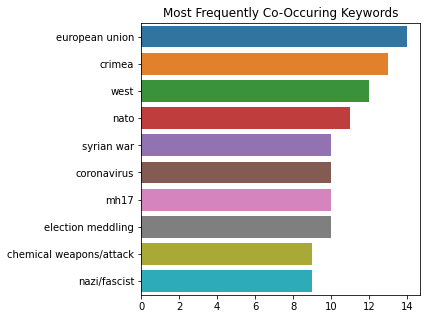

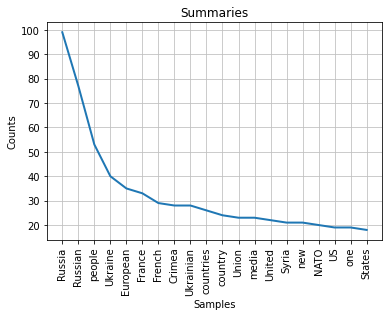

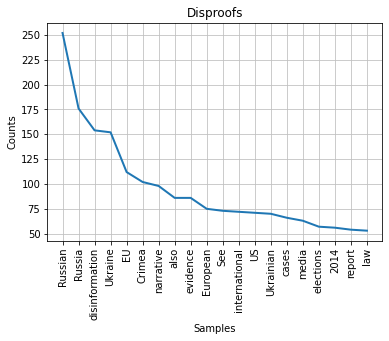

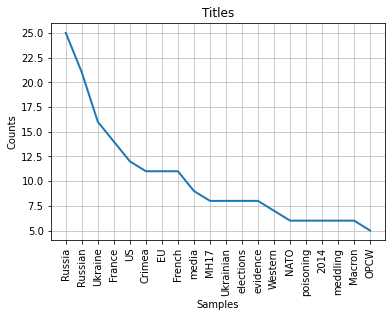

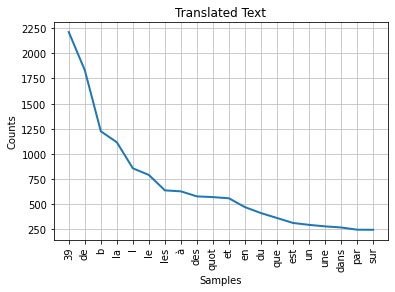

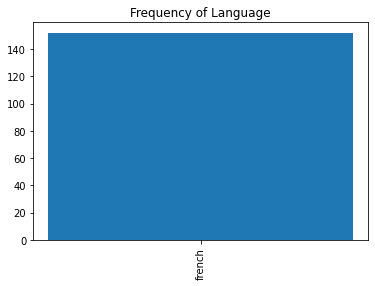

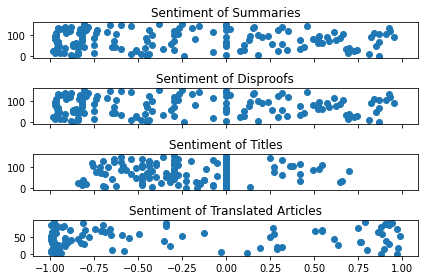

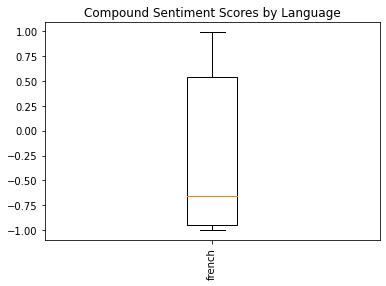

In [51]:
all_vis(french)

There are 5526 entries in the dataframe
The average title sentiment score is -0.14825506695620702
The number of article exceptions is 2302
The average summary sentiment score is -0.20726601520086863
The average disproof sentiment score is -0.23431469417300035
The average translated text sentiment score is -0.06660823603660461
<class 'list'>


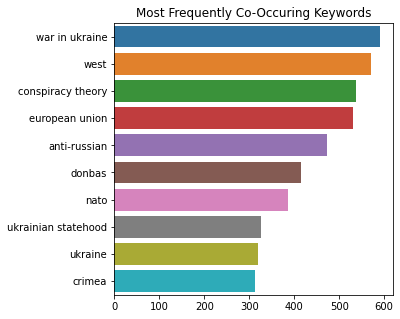

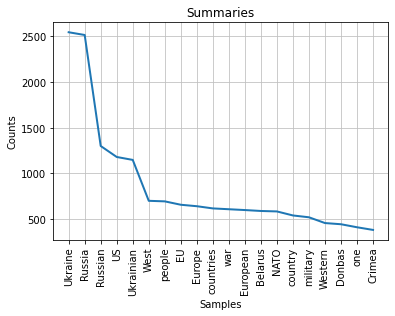

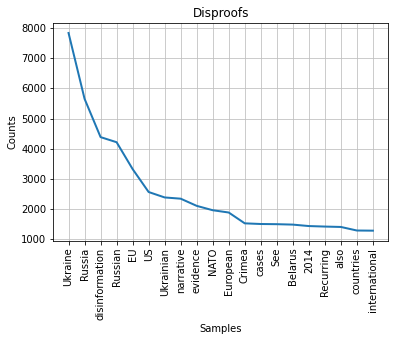

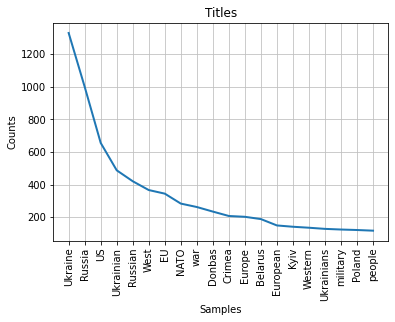

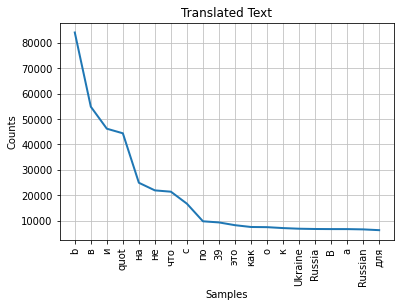

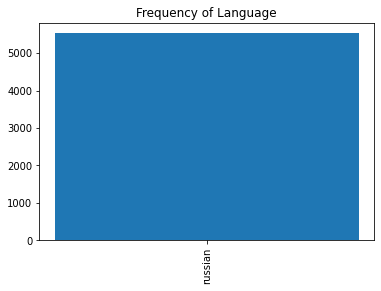

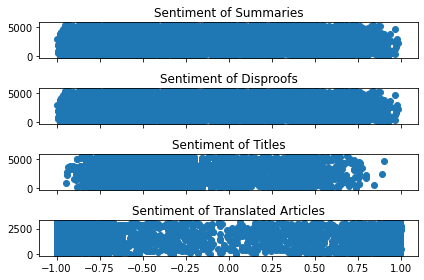

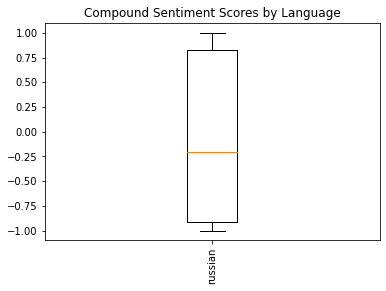

In [52]:
all_vis(russian)

There are 215 entries in the dataframe
The average title sentiment score is -0.14866744186046513
The number of article exceptions is 97
The average summary sentiment score is -0.23254139534883722
The average disproof sentiment score is -0.4364367441860465
The average translated text sentiment score is -0.22717884615384615
<class 'list'>


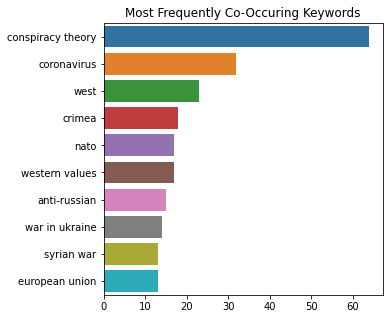

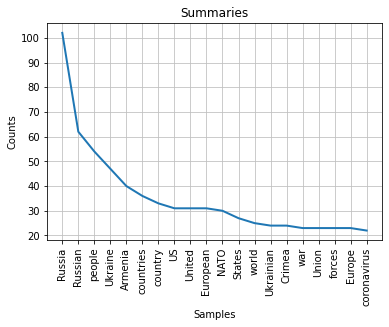

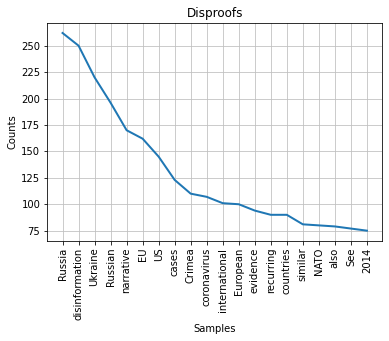

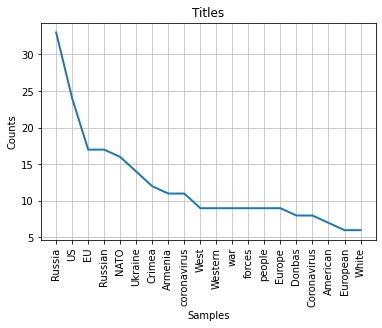

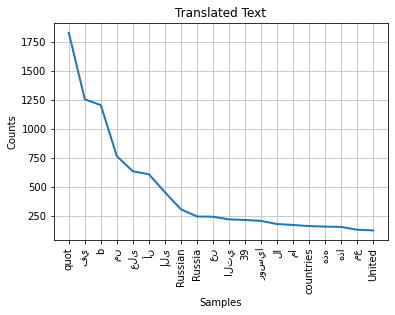

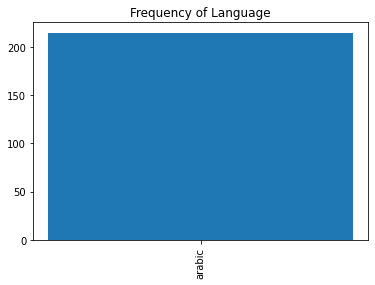

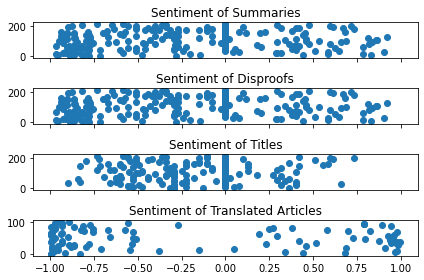

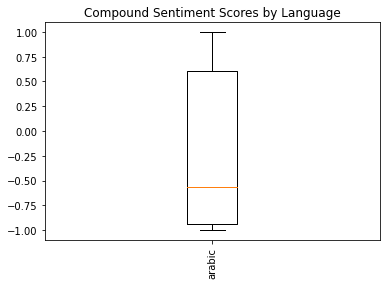

In [53]:
all_vis(arabic)

In [54]:
#all_vis(midf)

In [104]:
russian.to_excel('russian_processed.xlsx')
french.to_excel('french_processed.xlsx')
arabic.to_excel('arabic_processed.xlsx')

In [ ]:
### Lots of other stuff down here that is just other data I have run through ##

In [55]:
#all_vis(macron)

In [56]:
#all_vis(paris)

In [57]:
#all_vis(hebdo)

In [58]:
#all_vis(lepen)

In [59]:
#all_vis(midf)

In [60]:
# The sentiment of the summary based on the language of the article originally
# In future - apply this to acutal disinformation article
#lang_sent_vis(df)

In [61]:
## Here I will try to make some aggregate (whole DB) visualizations/stats

In [62]:
# Language vis
#language_vis(df)

In [63]:
# Lang sentiment vis

In [64]:
#lang_sent_vis(df)

In [65]:
# Sentiment graphs of whole db --> Too noisy/too many points to really see anything
#sentiment_vis(df)

In [66]:
# See the number of entries and the average compound sentiment of the dataframe
#see_stats(df)

In [67]:
# Translating full article for further analysis

In [68]:
# Sample text 
# test_article = 'Il 29 giugno, la comunità mondiale celebra la Giornata dei partigiani e degli insorgenti, la giornata dei “nascosti”.'

In [69]:
# blob = TextBlob(test_article)

In [70]:
# translated_sample = blob.translate(to='en')
# print(translated_sample)

In [71]:
# print(midf.columns)

In [72]:
#translate_full_text(midf)

In [73]:
# print(midf.columns)

In [74]:
# need to change data format of translated text
# display(midf)

In [75]:
### Here I will make a df for each of the keywords identified as Ethnic Groups and perform visualization ###
### Final dataframes will be sdf, ctdf, jdf, midf ###

In [76]:
# Key searches to make dfs

# For crimean tatars, must also include keyword tatars
# ctdf = keysearch('crimean tatars', df)
# ttdf = keysearch('tatars',df)

In [77]:
# ctdf = ctdf.append(ttdf)

In [78]:
# print(ctdf.columns)
# ctdf.drop_duplicates('ID')

In [79]:
# print(df['ID'].duplicated().any())

In [80]:
# sdf = keysearch('slavic', df)
# jdf = keysearch('jews', df)
# rdf = keysearch('ethnic russians', df)

In [81]:
# Making dfs for a few of the obvious enemies of Russia #

In [82]:
# we already have 'westdf'
# eudf = keysearch('european union', df)
# natodf = keysearch('nato', df)

In [83]:
# eudf2 = keysearch('european union', df)
# natodf2 = keysearch('nato', df)

In [84]:
#print(len(sdf), len(jdf), len(rdf), len(ctdf))

In [85]:
# Process each dataframe to get full article, translate, sentiment analysis #
# process_df(sdf)
#process_df(jdf)
#process_df(rdf)
#Note that midf processes above#

In [86]:
# adf = keysearch('africa', df)

In [87]:
# process_df(adf)

In [88]:
# TODO: Figure out why this cannot pull full article/no data points
#display(adf)
#all_vis(adf)

In [89]:
# process_df(eudf)
# process_df(natodf)

In [90]:
# all_vis(eudf2)

In [91]:
# all_vis(natodf2)

In [92]:
# process_df(ctdf)

In [93]:
# all_vis(midf)

In [94]:
# all_vis(ctdf)

In [95]:
# all_vis(sdf)

In [96]:
# all_vis(jdf)

In [97]:
# all_vis(rdf)

In [98]:
# Okay, I am cheating here an loading in the old df with articles pulled so I don't have to run all code again #
# In future: rerun all code for full df to get big averages
# alldf = pd.read_excel('full_articles_df2.xlsx')
# Just kidding, I would rather just run this overnight

In [99]:
# print(alldf.columns)

In [100]:
#process_df(df)

In [101]:
#all_vis(df)

In [102]:
# # Saving all files for late use (in case HTTP error etc)
# save_as_csv('\\processed_mi.xlsx', midf)
# save_as_csv('\\processed_russian.xlsx', rdf)
# save_as_csv('\\processed_tatars.xlsx', ctdf)
# save_as_csv('\\processed_jews..xlsx', jdf)
# save_as_csv('\\processed_slavic.xlsx', sdf)
# save_as_csv('\\processed_climate.xlsx', climatedf)

In [103]:
## I would like to put all the stats from the keysearch dataframe in a table so it is easier to compare ##
stats_df = pd.DataFrame(columns=['name','entries', 'exceptions', 'exceptions_ratio', 'avg_title', 'avg_summ', 'avg_dis', 'avg_full', 'min_full', 'max_full'])

dfs_to_compare = [midf,rdf,ctdf,jdf,sdf, climatedf]
names_list =['muslim/islam', 'russian', 'tatars', 'jews', 'slavic', 'climate']
for i in range(len(dfs_to_compare)):
    stats_df = compare_stats(dfs_to_compare[i], names_list[i], stats_df)

NameError: name 'rdf' is not defined

In [ ]:
# display(stats_df)

In [ ]:
# STATISTICAL COMPARISON OF DISTRIBUTIONS #
# Using Mann-Whitney U test to compare the distributions of all the full article sentiments
# I want to compare each distribution to all the others, then make a heat map of pvals
# H0: The distributions are the same
# Interpretation - the lower the p-value, the stronger the evidence against the null - therefore, the distributions are different


In [ ]:
# Take in a list of dfs and return 2d array for seaborn heatmap
def get_stats_grid(df_list):
    all_p_vals = []
    j=0
    for i in range(len(df_list)):
        # get list of compound scores
        all_sent1 =[]
        #print('On df # {}'.format(i))
        for item, row in df_list[i].iterrows():
            if row['fss'] != None:
                all_sent1.append(row['fss'].get('compound'))
        for j in range(len(df_list)):
            all_sent2=[]
            #print('Compare with df # {}'.format(j))
            row_p_vals=[]
            for item, row in df_list[j].iterrows():
                if row['fss'] != None:
                    all_sent2.append(row['fss'].get('compound'))
            u1, p = stats.mannwhitneyu(all_sent1, all_sent2)
            all_p_vals.append(p)
            #print(all_p_vals)
            j+=1
        #all_p_vals.append(row_p_vals)
        j=0
        i+=1
    all_p_vals = np.reshape(all_p_vals, (6,6))
    return all_p_vals

In [ ]:
# ax = plt.axes()
# ax.set_title('P-Values Mann-Whitney U Test Translated Text')
# seaborn.heatmap(stats_grid_result, annot=True , xticklabels=names_list, yticklabels=names_list)